# House Prices Prediction

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

dataframe = pd.read_csv("Housing.csv")

Understanding data

In [84]:
display(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None

In [85]:
display(dataframe.describe(include='all'))

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [86]:
dataframe.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [87]:
print(dataframe.duplicated().sum())
print(dataframe.isnull().sum())
print(dataframe.dtypes)

0
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


Exploratory Data Analysis - Visualising Data

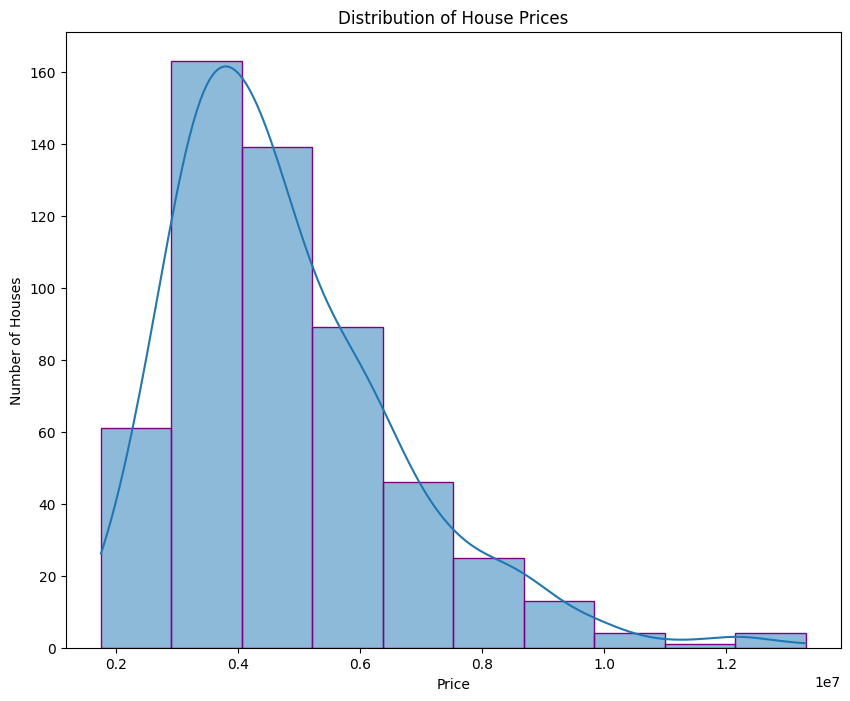

In [88]:
plt.figure(figsize=(10,8))
sns.histplot(dataframe['price'], bins=10, kde=True, edgecolor="purple")
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Number of Houses")
plt.show()

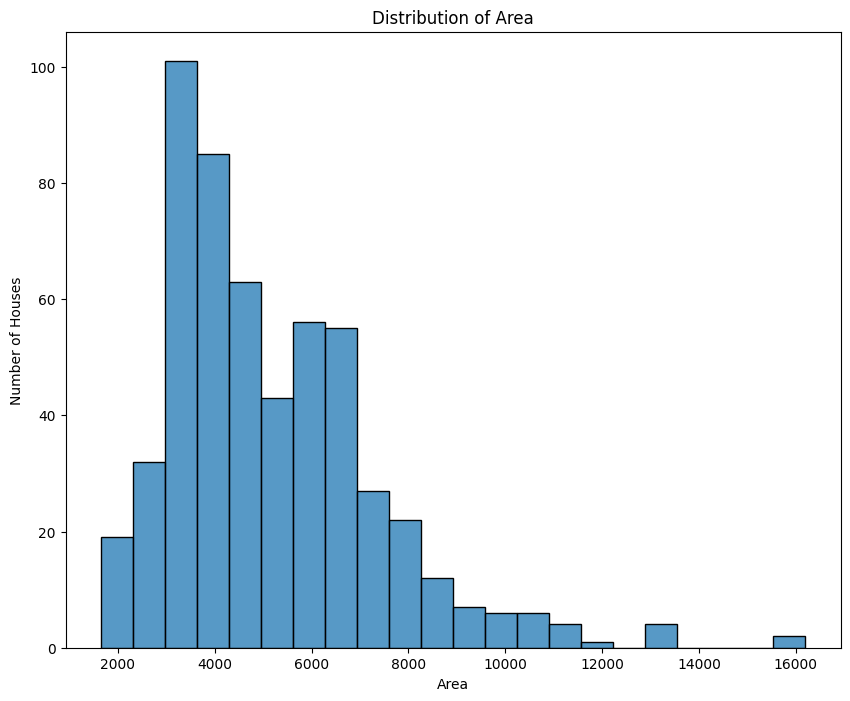

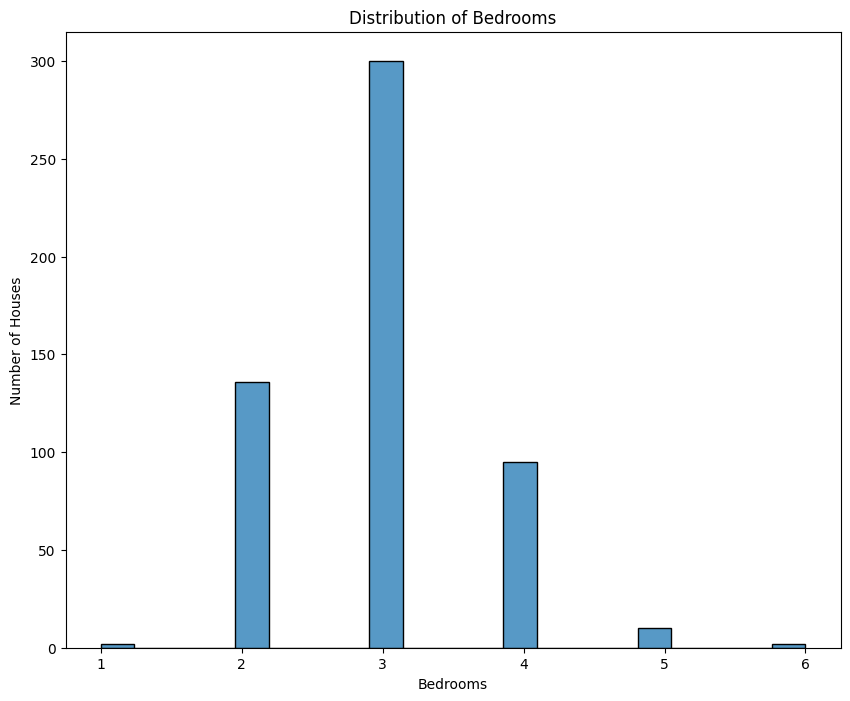

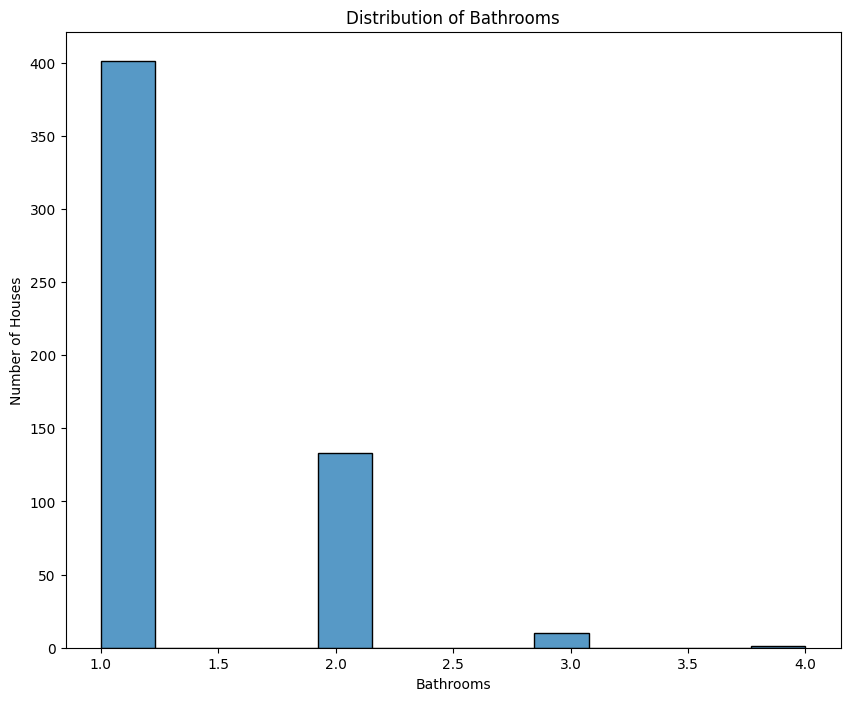

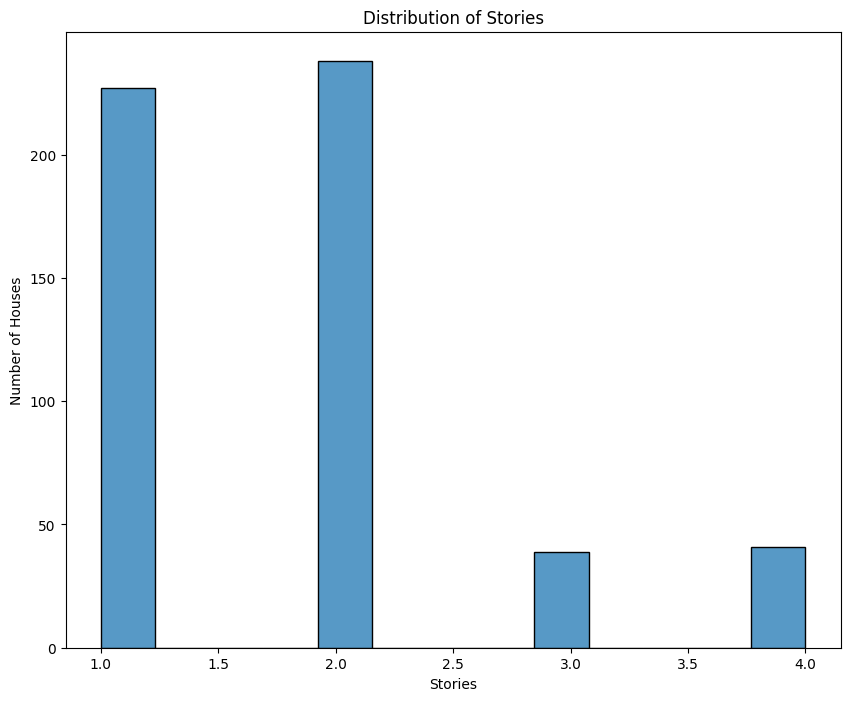

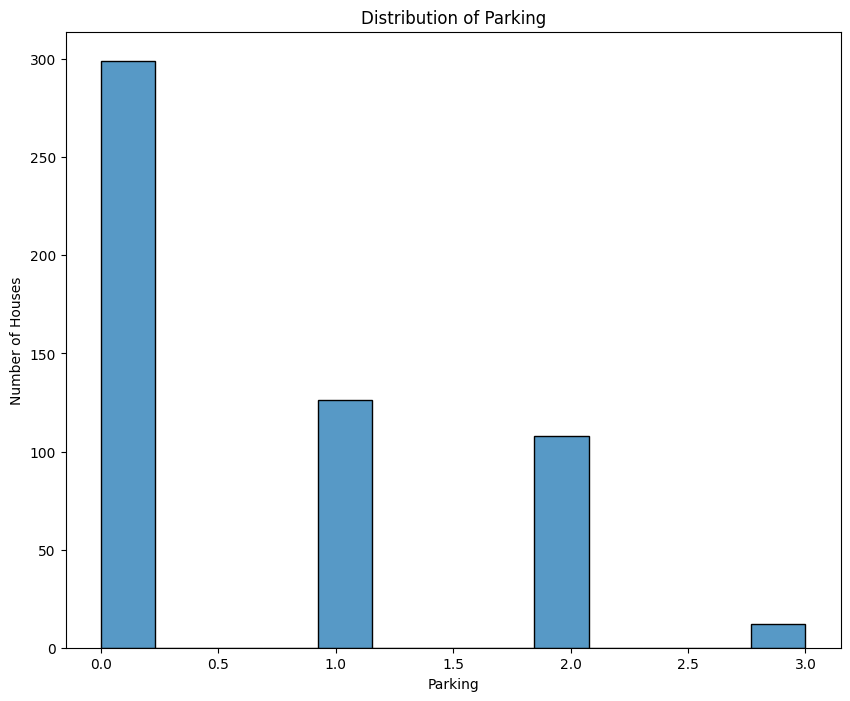

In [89]:
numeric_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

for col in numeric_cols:
    plt.figure(figsize=(10,8))
    sns.histplot(dataframe[col])
    plt.title(f"Distribution of {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Number of Houses")
    plt.show()

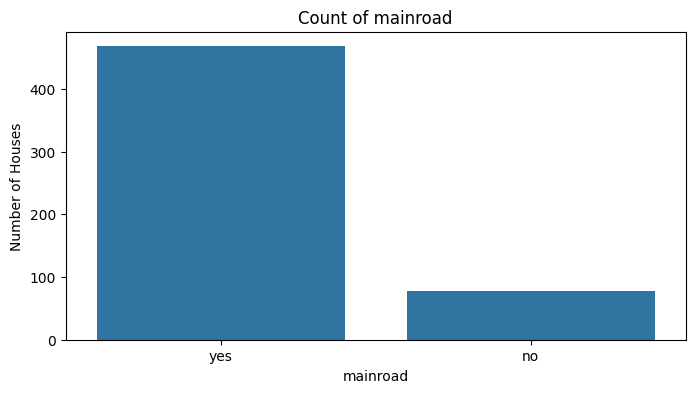

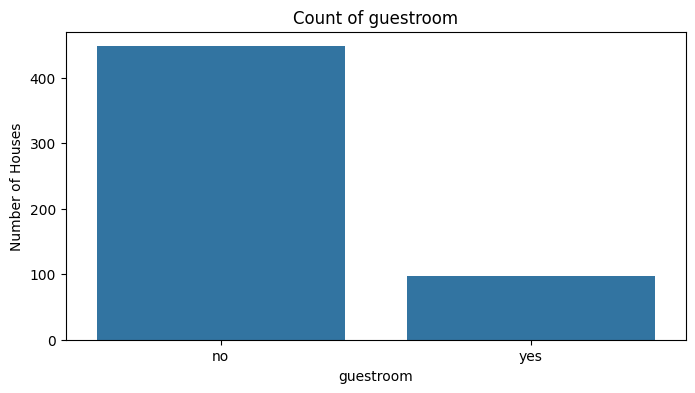

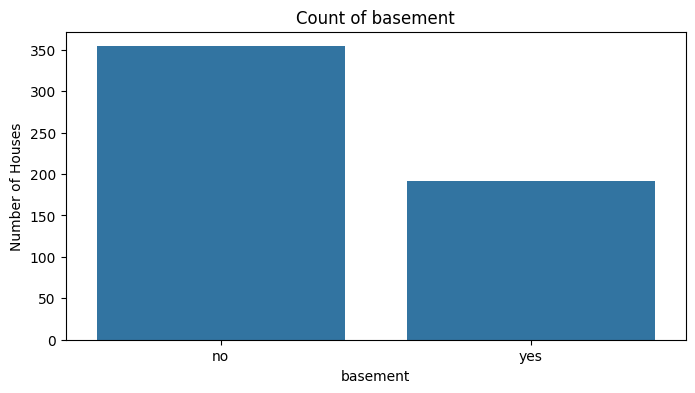

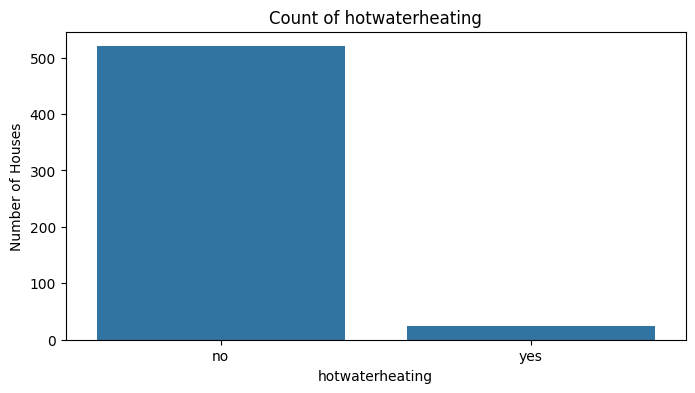

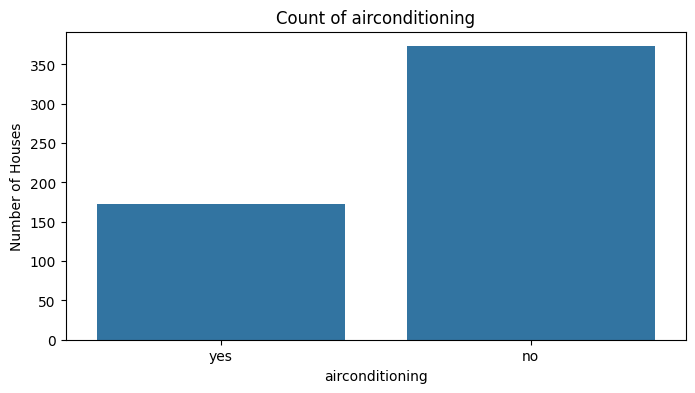

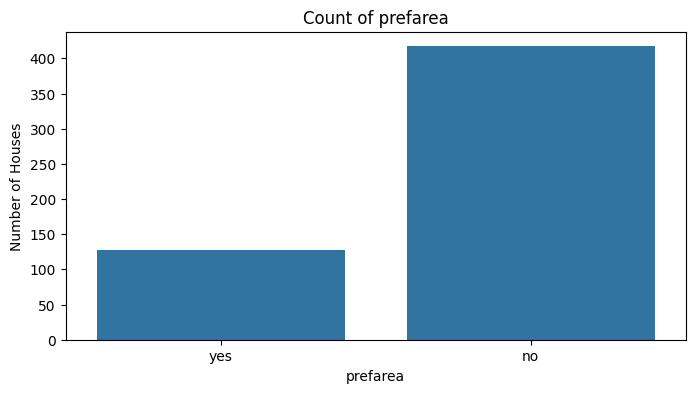

In [90]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=dataframe[col])
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Number of Houses")
    plt.show()

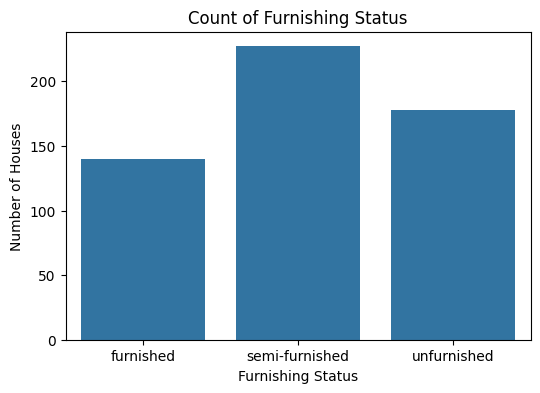

In [91]:
plt.figure(figsize=(6,4))
sns.countplot(x=dataframe['furnishingstatus'])
plt.title("Count of Furnishing Status")
plt.xlabel("Furnishing Status")
plt.ylabel("Number of Houses")
plt.show()

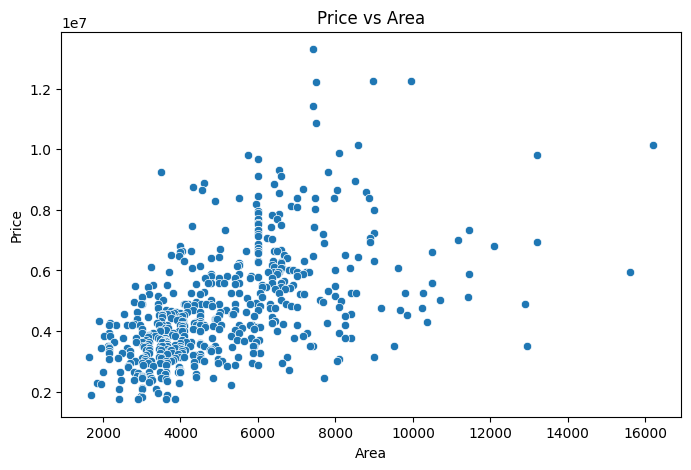

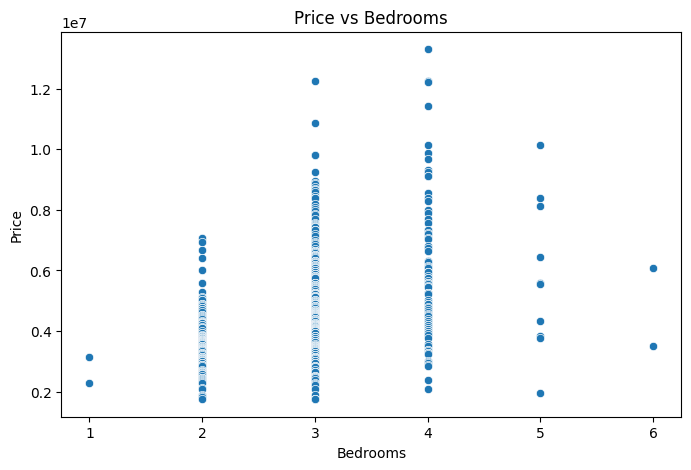

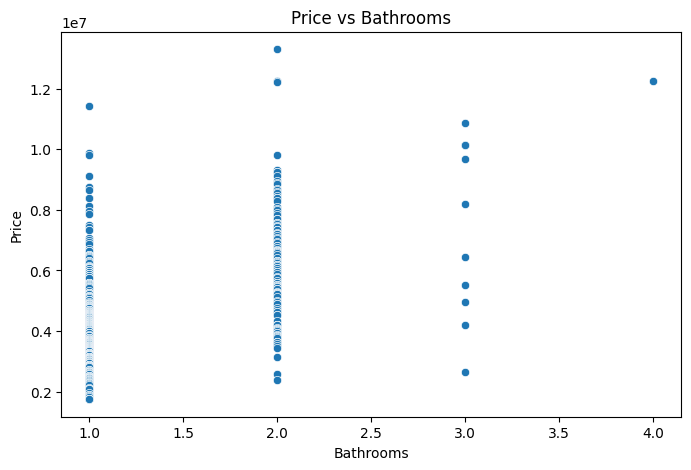

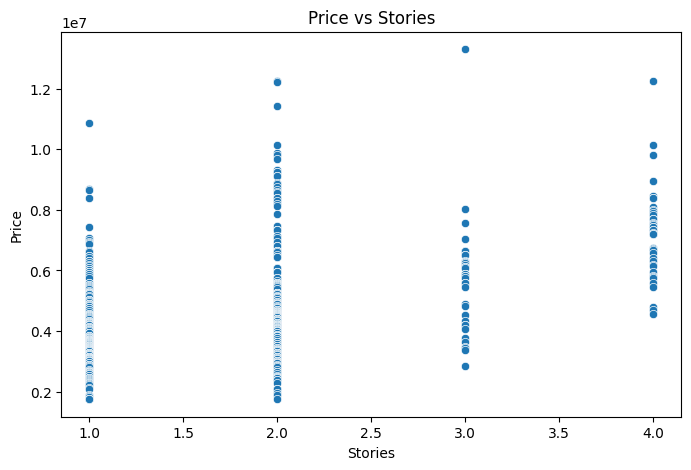

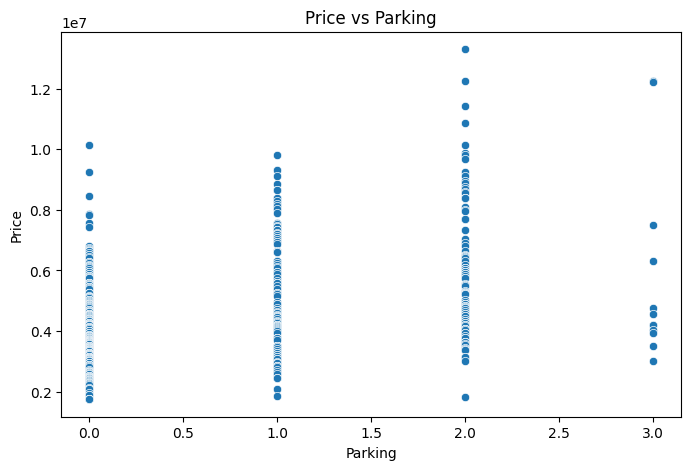

In [92]:
for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=dataframe[col], y=dataframe['price'])
    plt.title(f"Price vs {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Price")
    plt.show()

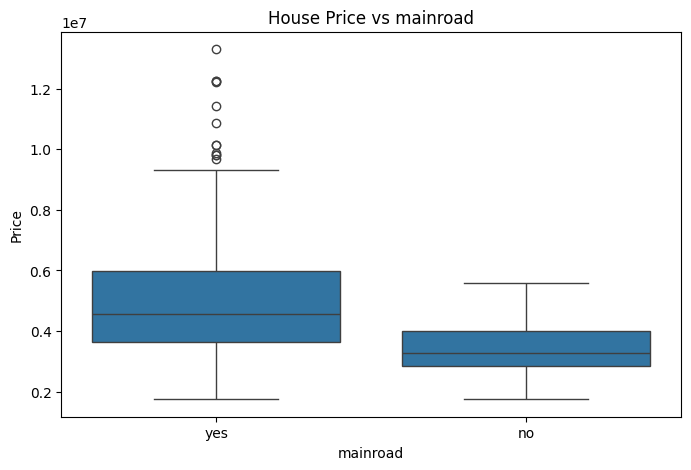

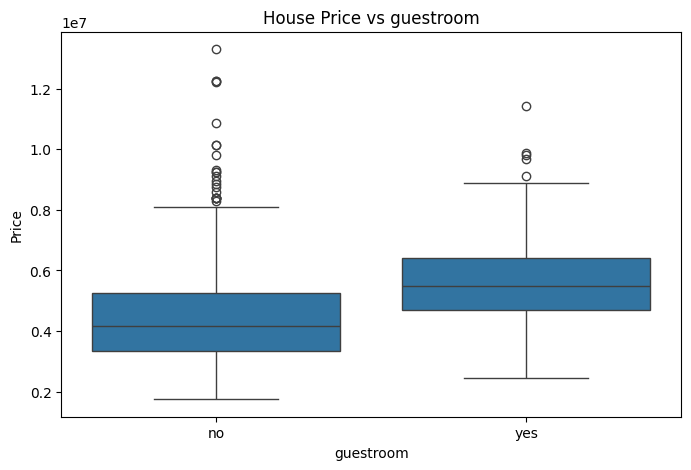

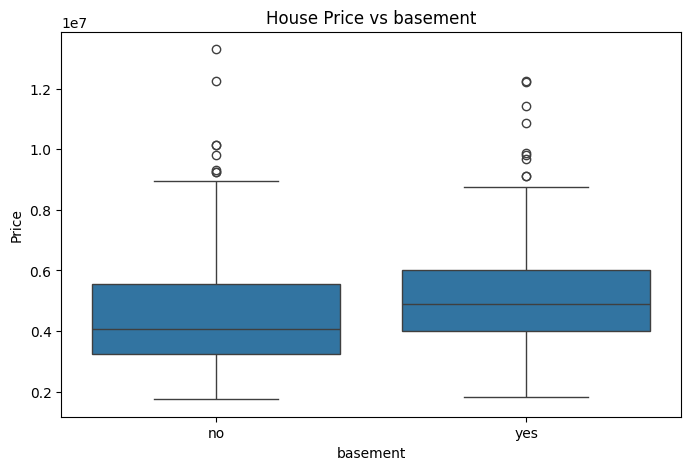

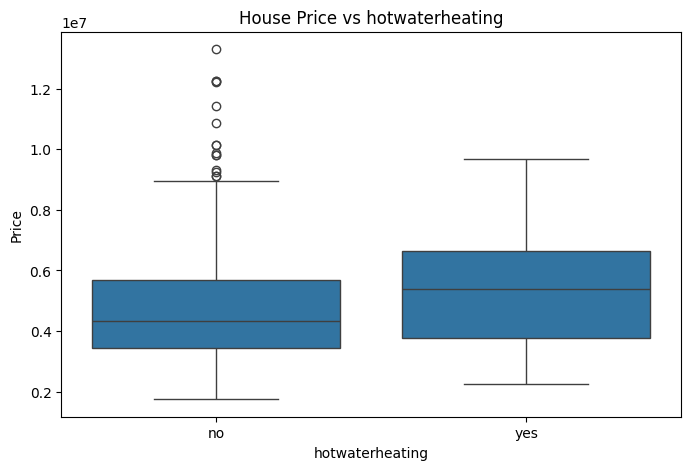

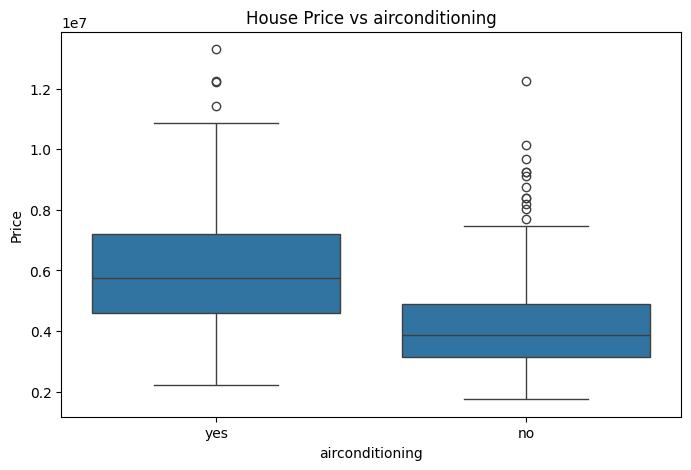

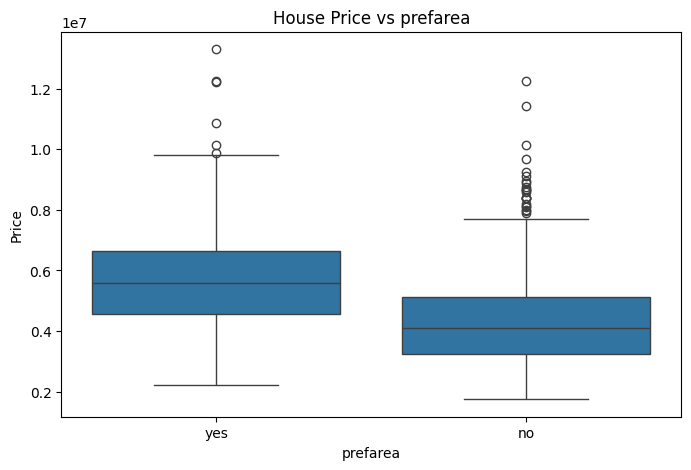

In [93]:
for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=col, y='price', data=dataframe)
    plt.title(f"House Price vs {col}")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()

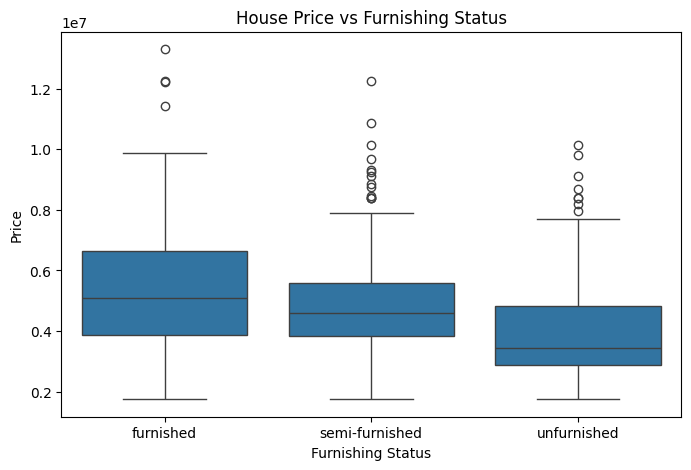

In [94]:
plt.figure(figsize=(8,5))
sns.boxplot(x='furnishingstatus', y='price', data=dataframe)
plt.title("House Price vs Furnishing Status")
plt.xlabel("Furnishing Status")
plt.ylabel("Price")
plt.show()

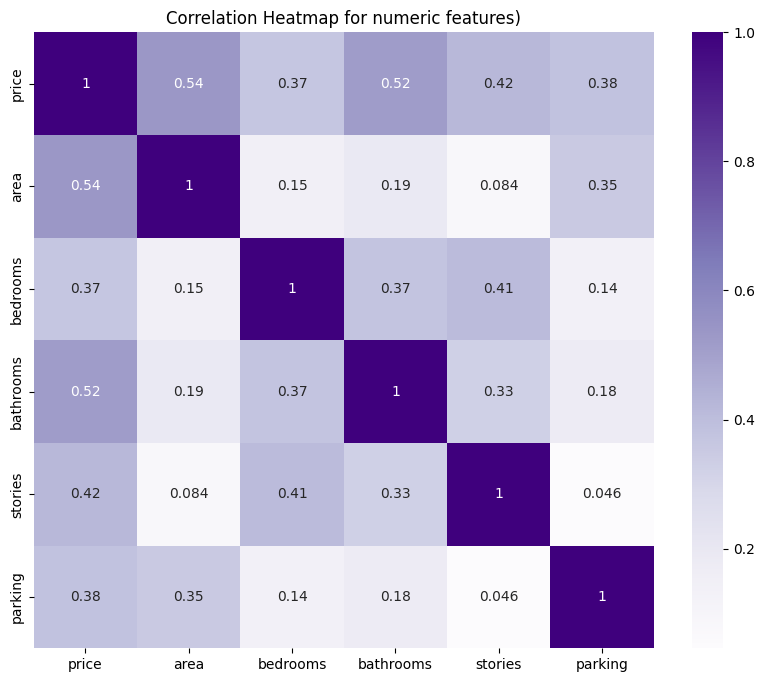

In [95]:
plt.figure(figsize=(10,8))
heatmap = dataframe[
    ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
    ].corr()
sns.heatmap(heatmap, annot=True, cmap="Purples")
plt.title("Correlation Heatmap for numeric features)")
plt.show()

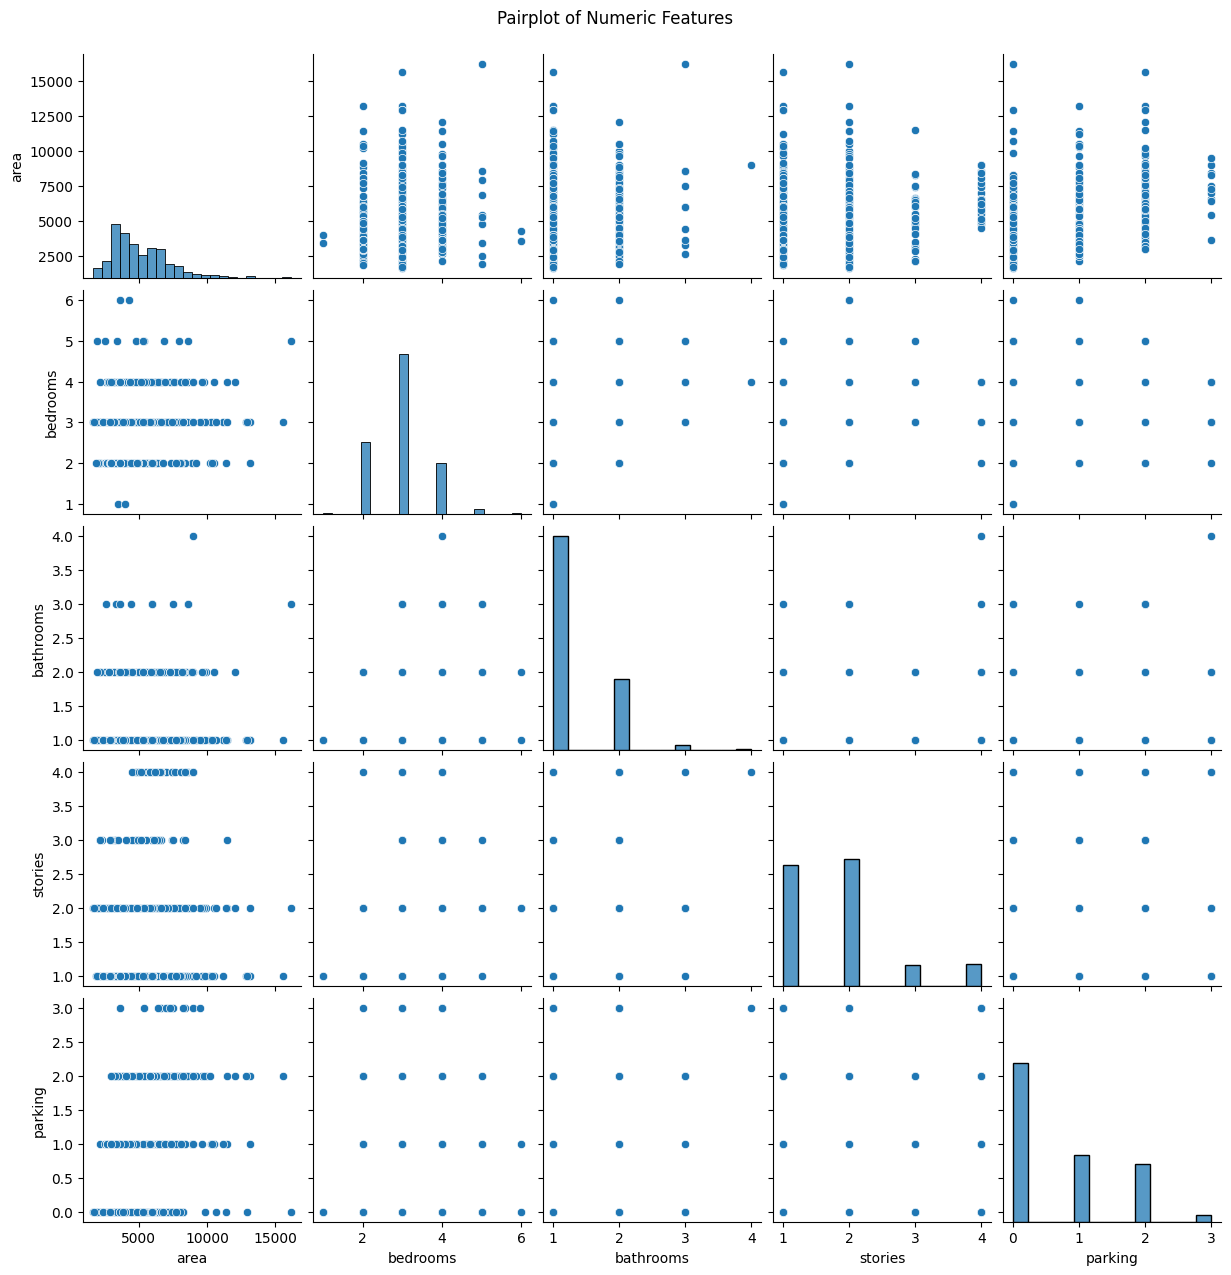

In [96]:
sns.pairplot(dataframe[numeric_cols])
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

Encoding

In [97]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    dataframe[col] = dataframe[col].map({'yes': 1, 'no': 0})

In [98]:
dataframe = pd.get_dummies(dataframe, columns=['furnishingstatus'], drop_first=True)

In [106]:
dataframe = dataframe.replace({True: 1, False: 0})

In [107]:
dataframe['price_per_area'] = dataframe['price'] / dataframe['area']
dataframe['total_rooms'] = dataframe['bedrooms'] + dataframe['bathrooms']

Train and Test

In [108]:
X = dataframe.drop(columns=['price'], axis=1)
y = dataframe['price']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear Regression

In [111]:
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)
y_pred = regressor.predict(X_test_scaled)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)
print("Linear Regression RMSE:", np.round(RMSE, 3))
print("Linear Regression R2:", np.round(R2,3))

Linear Regression RMSE: 766300.914
Linear Regression R2: 0.884


Ridge Regression

In [112]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
MSE_ridge = mean_squared_error(y_test, y_pred_ridge)
RMSE_ridge = np.sqrt(MSE_ridge)
R2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge RMSE:", np.round(RMSE_ridge,3))
print("Ridge R2:", np.round(R2_ridge,3))

Ridge RMSE: 769482.459
Ridge R2: 0.883


Lasso Regression

In [114]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
MSE_lasso = mean_squared_error(y_test, y_pred_lasso)
RMSE_lasso = np.sqrt(MSE_lasso)
R2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso RMSE:", np.round(RMSE_lasso,3))
print("Lasso R2:", np.round(R2_lasso,3))

Lasso RMSE: 766300.915
Lasso R2: 0.884


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.021e+12, tolerance: 1.344e+11
  model = cd_fast.enet_coordinate_descent(


Decision Tree

In [116]:
decisiontree = DecisionTreeRegressor(random_state=42)
decisiontree.fit(X_train, y_train)
y_pred_decisiontree = decisiontree.predict(X_test)
MSE_decisiontree = mean_squared_error(y_test, y_pred_decisiontree)
RMSE_decisiontree = np.sqrt(MSE_decisiontree)
R2_decisiontree = r2_score(y_test, y_pred_decisiontree)
print("Decision Tree RMSE:", np.round(RMSE_decisiontree,3))
print("Decision Tree R2:", np.round(R2_decisiontree,3))

Decision Tree RMSE: 659273.947
Decision Tree R2: 0.914


Random Forest

In [119]:
randomforest = RandomForestRegressor(random_state=42)
randomforest.fit(X_train, y_train)
y_pred_randomforest = randomforest.predict(X_test)

MSE_randomforest = mean_squared_error(y_test, y_pred_randomforest)
RMSE_randomforest = np.sqrt(MSE_randomforest)
R2_randomforest = r2_score(y_test, y_pred_randomforest)

print("Random Forest RMSE:", np.round(RMSE_randomforest,3))
print("Random Forest R2:", np.round(R2_randomforest,3))

Random Forest RMSE: 573974.277
Random Forest R2: 0.935


Comparing Models

In [128]:
results = {
    "Model": ["Linear Regression", "Ridge", "Lasso", "Decision Tree", "Random Forest"],
    "RMSE": [RMSE, RMSE_ridge, RMSE_lasso, RMSE_decisiontree, RMSE_randomforest],
    "R2 Score": [R2, R2_ridge, R2_lasso, R2_decisiontree, R2_randomforest]
}

results_dataframe = pd.DataFrame(results)
display(results_dataframe)

,Model,RMSE,R2 Score
0,Linear Regression,766300.914359,0.883825
1,Ridge,769482.458776,0.882858
2,Lasso,766300.915293,0.883825
3,Decision Tree,659273.947320,0.914010
4,Random Forest,573974.276760,0.934822


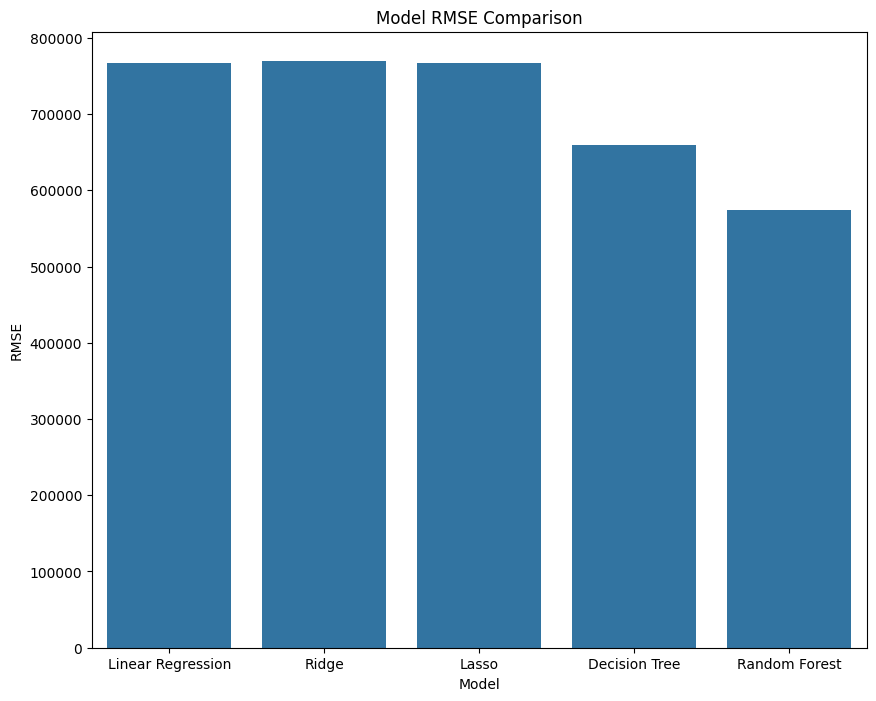

In [130]:
plt.figure(figsize=(10,8))
sns.barplot(x="Model", y="RMSE", data=results_dataframe)
plt.title("Model RMSE Comparison")
plt.show()

Best regression model: Random Forest

Finalisation

In [120]:
importances = randomforest.feature_importances_
features = X.columns

In [124]:
feature_importance_df = pd.DataFrame(
    {'Feature': features,
     'Importance': importances}
    )
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

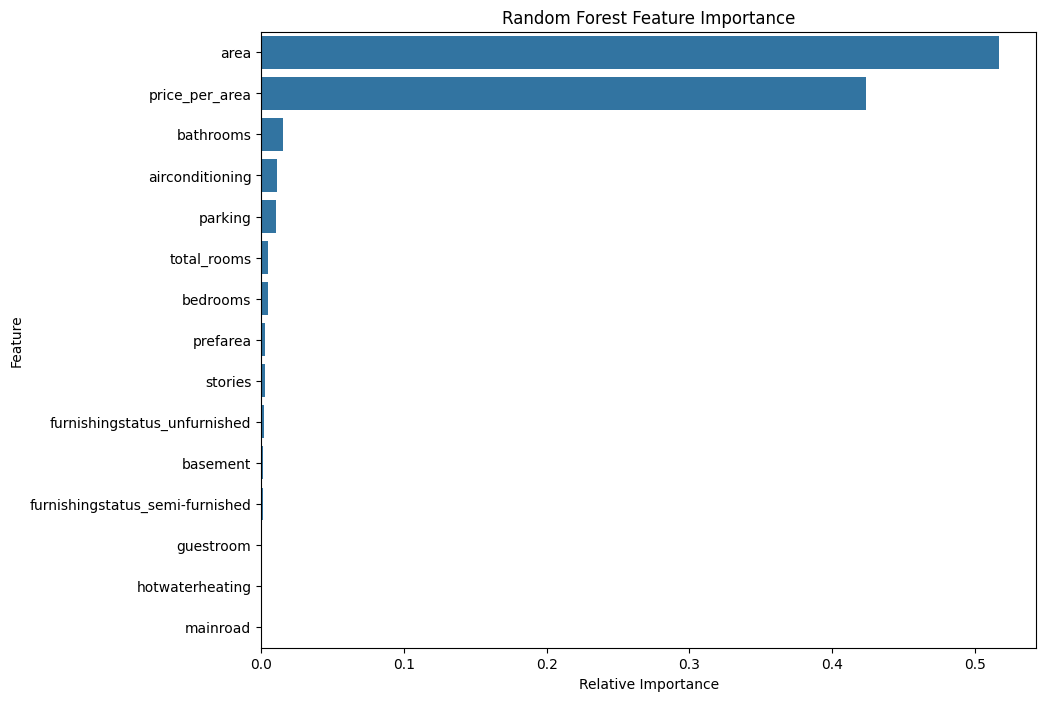

In [126]:
plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Random Forest Feature Importance")
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.show()